Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [7]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [8]:
df.tail(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14979,0.09,0.93,6,296,4,0,1,0,technical,medium
14980,0.76,0.89,5,238,5,0,1,0,technical,high
14981,0.73,0.93,5,162,4,0,1,0,technical,low
14982,0.38,0.49,2,137,3,0,1,0,technical,medium
14983,0.72,0.84,5,257,5,0,1,0,technical,medium
14984,0.40,0.56,2,148,3,0,1,0,technical,medium
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14988,0.46,0.55,2,145,3,0,1,0,technical,low


### EDA

In [4]:
df.shape

(14999, 10)

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [21]:
df.Department.value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

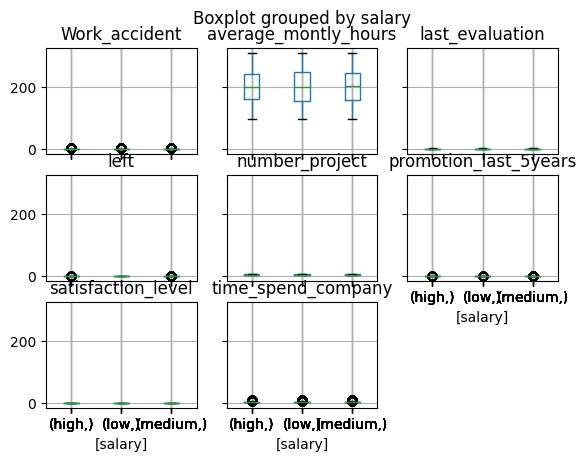

In [30]:
%matplotlib inline
df.boxplot(by = ['salary']) 
plt.show()

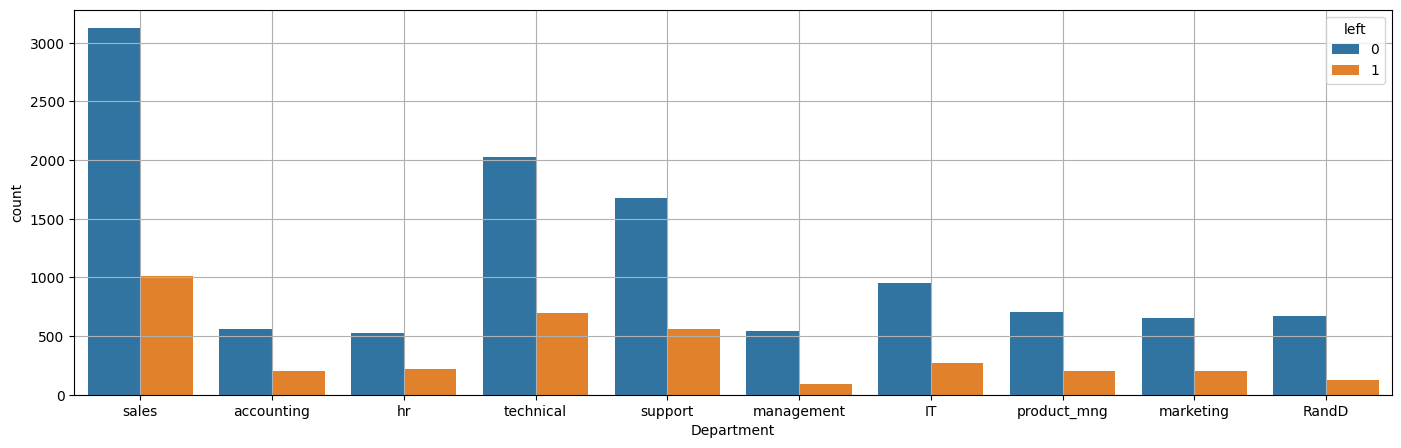

In [44]:
plt.figure(figsize=(17, 5))
sns.countplot(x = 'Department', data = df, hue = 'left')
plt.grid()

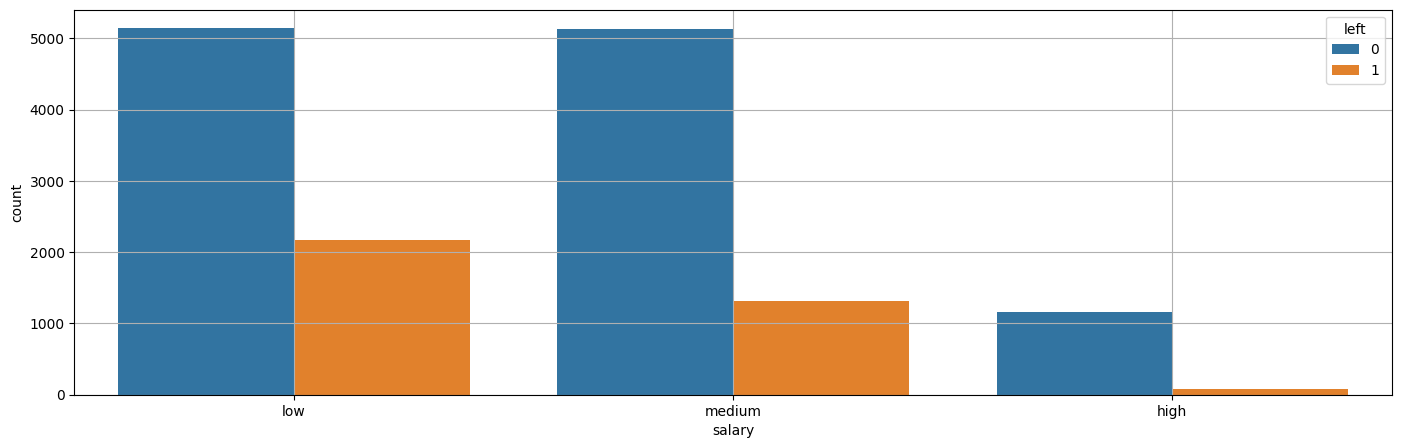

In [61]:
plt.figure(figsize=(17, 5))
sns.countplot(x = 'salary', data = df, hue = 'left')
plt.grid()

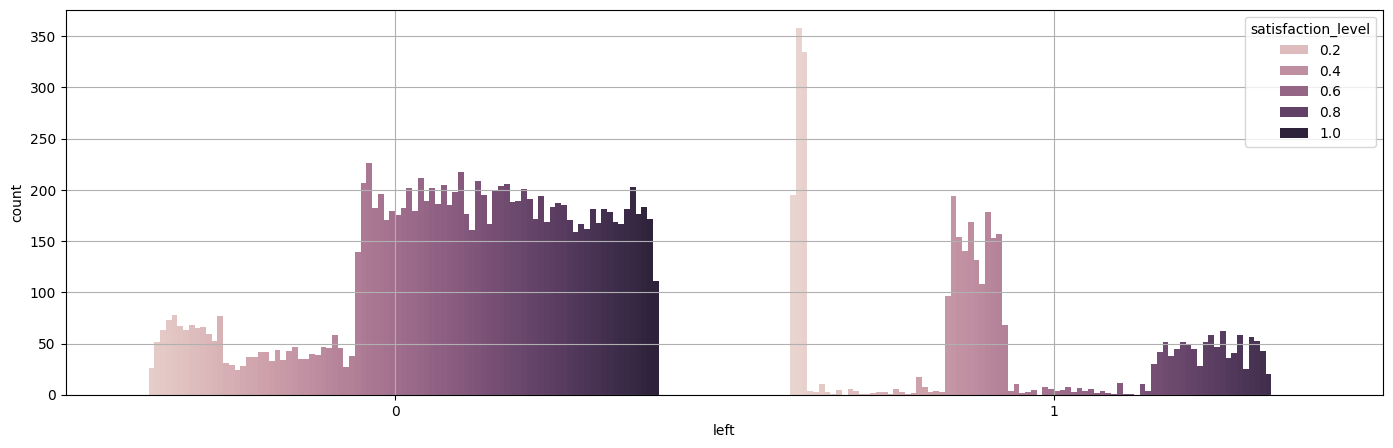

In [64]:
plt.figure(figsize=(17, 5))
sns.countplot(hue = 'satisfaction_level', data = df, x = 'left')
plt.grid()

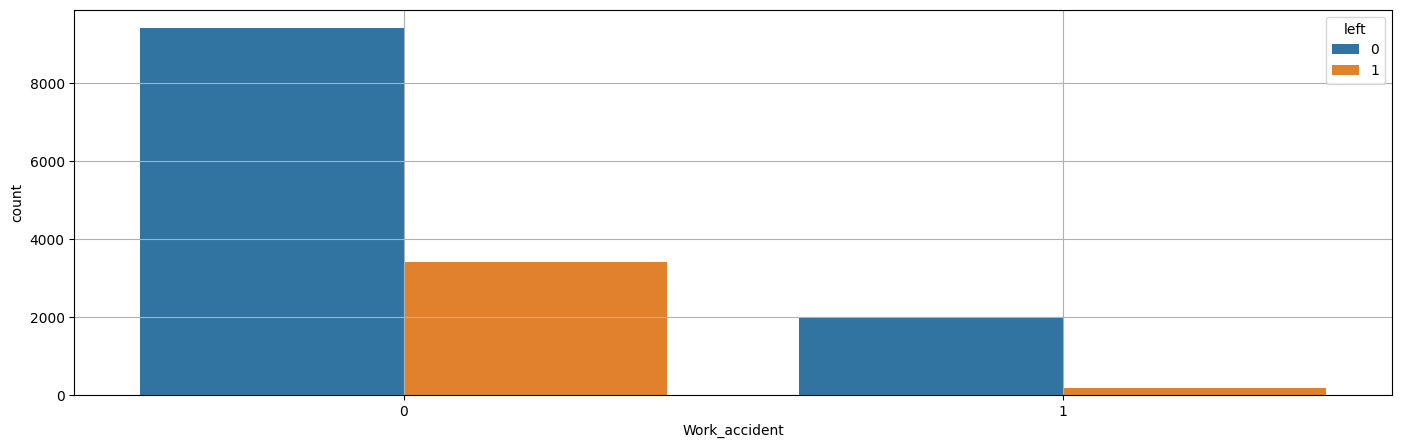

In [68]:
plt.figure(figsize=(17, 5))
sns.countplot(x = 'Work_accident', data = df, hue = 'left')
plt.grid()

In [65]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [98]:
df.time_spend_company.value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

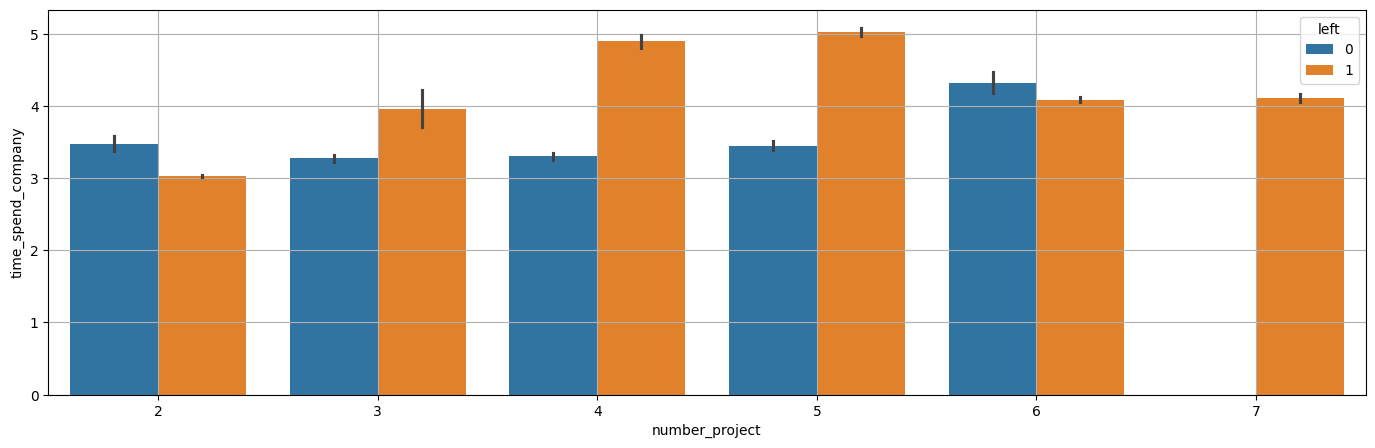

In [104]:
plt.figure(figsize=(17, 5))
sns.barplot(x = 'number_project', y = 'time_spend_company', data = df, hue = 'left')
plt.grid()

In [111]:
df.loc[df.number_project == 7,['time_spend_company','left']].value_counts()

time_spend_company  left
4                   1       210
5                   1        38
3                   1         7
2                   1         1
Name: count, dtype: int64

### Traning model

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [114]:
dfle = df

In [116]:
dfle.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [151]:
dfle['Department_le'] = le.fit_transform(dfle.Department)
dfle.loc[dfle.Department_le >= 0,['Department','Department_le']].value_counts()

Department   Department_le
sales        7                4140
technical    9                2720
support      8                2229
IT           0                1227
product_mng  6                 902
marketing    5                 858
RandD        1                 787
accounting   2                 767
hr           3                 739
management   4                 630
Name: count, dtype: int64

In [152]:
dfle['salary_le'] = le.fit_transform(dfle.salary)
dfle.loc[dfle.salary_le >=0 ,['salary_le','salary']].value_counts()

salary_le  salary
1          low       7316
2          medium    6446
0          high      1237
Name: count, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

In [87]:
lreg = linear_model.LogisticRegression()

In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['satisfaction_level','average_montly_hours','promotion_last_5years','time_spend_company','Department_le','salary_le']],
                 df.left,test_size = 0.3)

In [201]:
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,Department_le,salary_le
1782,0.73,268,0,5,7,2
4498,0.85,143,0,6,0,2
14915,0.43,142,0,3,8,1
6137,0.92,258,0,3,3,2
13438,0.48,150,0,10,9,1
...,...,...,...,...,...,...
4419,0.83,232,0,3,6,1
12426,0.74,261,0,5,9,2
13610,0.51,258,0,2,7,2
9736,0.83,268,0,2,9,2


In [202]:
lreg.fit(X_train,Y_train)

C:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [203]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,time_spend_company,Department_le,salary_le
4549,0.90,215,1,3,9,1
13186,0.93,158,0,3,4,2
5837,0.79,173,0,4,9,1
10172,0.53,281,0,4,7,0
6248,0.89,159,0,3,6,2
...,...,...,...,...,...,...
7506,0.14,114,0,3,7,1
2271,0.61,231,0,3,9,1
5343,0.74,275,0,3,7,1
1726,0.45,137,0,3,8,1


In [204]:
lreg.predict([[0.7,300,1,6,0,2]])

C:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [215]:
lreg.predict([[0.1,100,0,3,0,1]])

C:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [216]:
lreg.predict_proba([[0.1,100,0,3,0,1]])

C:\Users\ibrah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.45606246, 0.54393754]])

In [206]:
lreg.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
lreg.score(X_test,Y_test)*100

75.75555555555556